In [275]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gmaps
import postcodes_io_api
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [203]:
df0= pd.read_csv('pricelondon.csv')

In [204]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242605 entries, 0 to 3242604
Data columns (total 16 columns):
ID             object
Price          int64
Date           object
Postcode       object
Type           object
Newbuild       object
Duration       object
PAON           object
SAON           object
Street         object
Locality       object
Town           object
District       object
County         object
Transaction    object
Record         object
dtypes: int64(1), object(15)
memory usage: 395.8+ MB


In [205]:
df0.isnull().sum()

ID                   0
Price                0
Date                 0
Postcode          5275
Type                 0
Newbuild             0
Duration             0
PAON                51
SAON           2200850
Street            2394
Locality       1584162
Town                 0
District             0
County               0
Transaction          0
Record               0
dtype: int64

In [206]:
df0.Date=pd.to_datetime(df0.Date)

In [207]:
df0.isna().sum()

ID                   0
Price                0
Date                 0
Postcode          5275
Type                 0
Newbuild             0
Duration             0
PAON                51
SAON           2200850
Street            2394
Locality       1584162
Town                 0
District             0
County               0
Transaction          0
Record               0
dtype: int64

In [208]:
df0 = df0.drop(labels=['Locality','SAON','Record'], axis=1)

In [209]:
df0 = df0.dropna()

In [210]:
df0.isna().sum()

ID             0
Price          0
Date           0
Postcode       0
Type           0
Newbuild       0
Duration       0
PAON           0
Street         0
Town           0
District       0
County         0
Transaction    0
dtype: int64

In [211]:
df0 = df0.reset_index(drop=True)

In [212]:
df0 = df0[df0.Newbuild=='Y']
df0 = df0[df0.Type!='O']

In [213]:
district = df0.District.unique().tolist()

In [215]:
df0 = df0.sort_values(by='Date')

In [216]:
dis = dict()

for i in district:
    dis[i] = df0[df0.District == i]

In [240]:
for key,val in dis.items():
    df0[key] = dis[key]['Price'].rolling(100).mean()

In [241]:
df1 = df0[df0.Date > '2010-01-01']

In [251]:
df1['ordinal'] = df1['Date'].apply(lambda date: date.toordinal())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


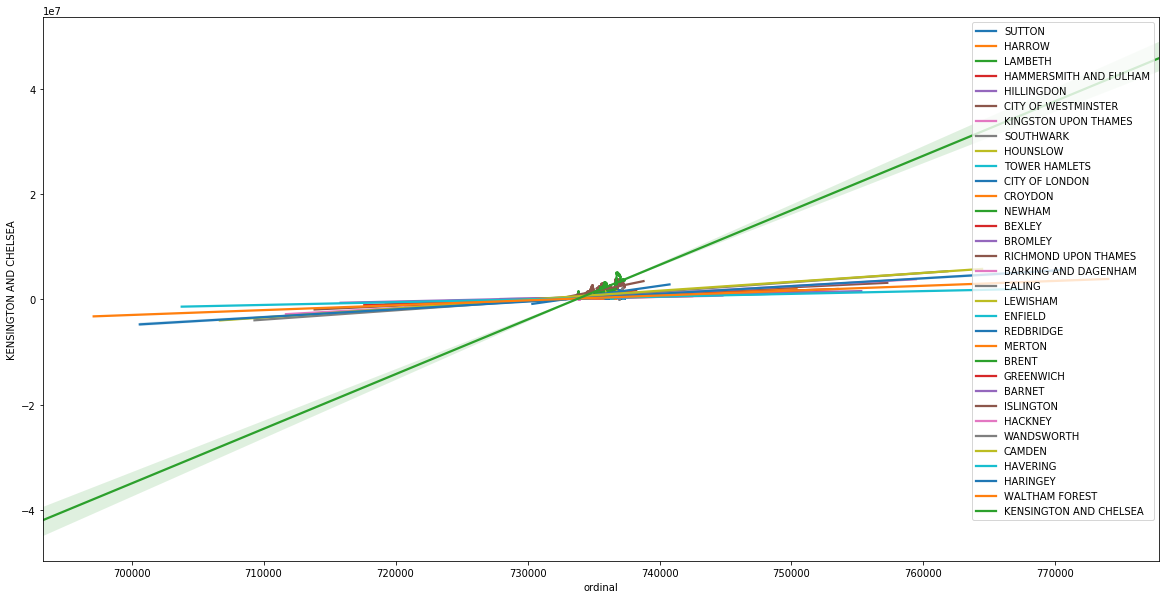

In [268]:
plt.figure(figsize=(20,10))
for i in district:
    sns.regplot(data=df1, x='ordinal',y=i, fit_reg=True, robust=True, scatter_kws={'s': 1})
plt.legend(labels=district)
plt.show()

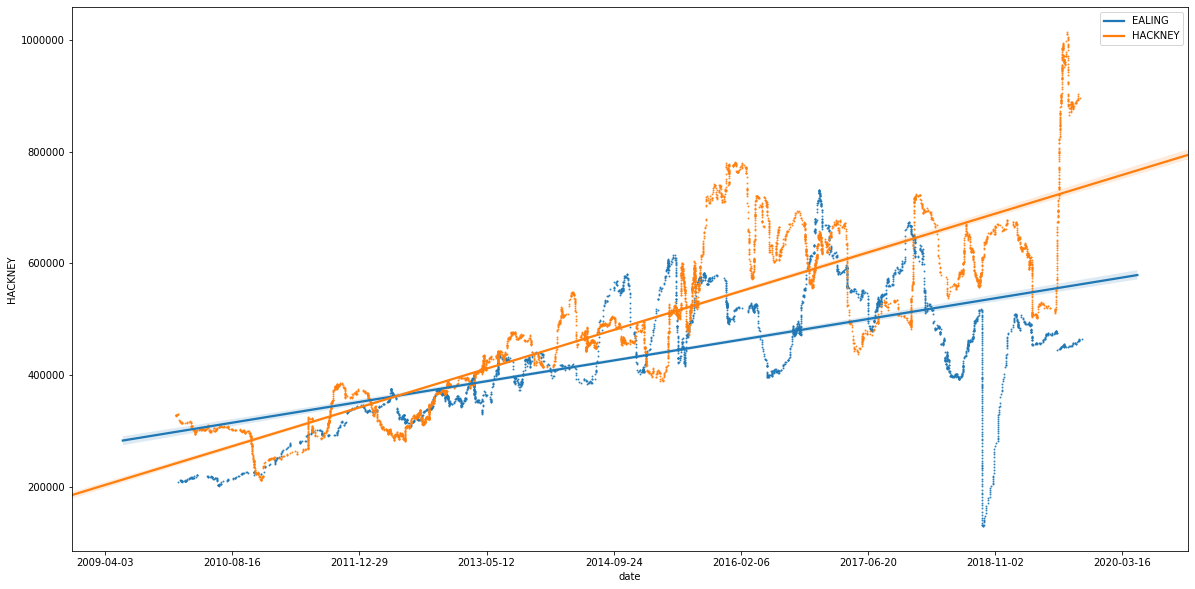

In [277]:
plt.figure(figsize=(20,10))
ax = sns.regplot(data=df1, x='ordinal',y='EALING', fit_reg=True, robust=True, scatter_kws={'s': 1})
sns.regplot(data=df1, x='ordinal',y='HACKNEY', fit_reg=True, robust=True, scatter_kws={'s': 1})
plt.legend(labels=['EALING','HACKNEY'])

ax.set_xlabel('date')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)



plt.show()

In [265]:
dis['KENSINGTON AND CHELSEA'].sort_values(by='Price',ascending=False)

,ID,Price,Date,Postcode,Type,Newbuild,Duration,PAON,Street,Town,District,County,Transaction
3156107,{68FEB20B-1EB6-38DA-E053-6C04A8C051AE},33025000,2018-01-26,W8 7AD,F,Y,L,6,CAMPDEN HILL,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
3012634,{666758D7-9298-3363-E053-6B04A8C0D74E},29150000,2017-12-28,W8 7AD,F,Y,L,6,CAMPDEN HILL,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B
2880226,{3E0330F0-ABF8-8D89-E050-A8C062052140},26800000,2016-02-11,W8 6AX,F,Y,L,56,HOLLANDGREEN PLACE,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,B
2777107,{124F0313-22A5-4E36-B492-8A7EC4001546},22700000,2015-05-12,SW3 5QP,F,Y,L,"PENTHOUSE 5TH FLOOR APARTMENT, 79",CHELSEA MANOR STREET,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
3156106,{68FEB20B-1EB4-38DA-E053-6C04A8C051AE},21100000,2018-01-26,W8 7AD,F,Y,L,6,CAMPDEN HILL,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416367,{2A289E9E-38B0-CDC8-E050-A8C063054829},40000,2004-03-01,SW3 5BL,F,Y,F,CADOGAN HOUSE,BEAUFORT STREET,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
86039,{2A289E9E-3773-CDC8-E050-A8C063054829},40000,1995-01-20,SW3 1AX,F,Y,L,"JEFFERSON HOUSE, 11",BASIL STREET,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
1417710,{2A289E9E-38AD-CDC8-E050-A8C063054829},40000,2004-08-17,W8 4LF,F,Y,L,9,KENSINGTON CHURCH STREET,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A
64095,{2A289E9E-37EA-CDC8-E050-A8C063054829},17500,1995-12-15,W10 6QN,F,Y,L,324,LATIMER ROAD,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A


Exploring EALING

In [28]:
ealing = df[df.District == 'EALING'].reset_index(drop=True)

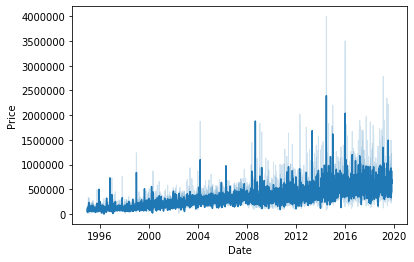

In [34]:
sns.lineplot(data=ealing, x='Date',y='Price')

In [36]:
ealing.Price.describe()

count    1.125210e+05
mean     2.897181e+05
std      2.606811e+05
min      1.000000e+00
25%      1.350000e+05
50%      2.263300e+05
75%      3.550000e+05
max      1.125000e+07
Name: Price, dtype: float64

In [37]:
eal10 = ealing[ealing.Date > '2010-01-01'].sort_values(by='Date').reset_index()

In [54]:
eal10['roll'] = eal10['Price'].rolling(100).mean()

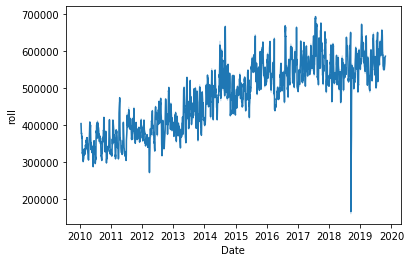

In [55]:
sns.lineplot(data=eal10, x='Date',y='roll')

In [56]:
eal10['roll'].describe()

count     33023.000000
mean     478841.383534
std       90395.507955
min      153630.030000
25%      401328.210000
50%      490744.330000
75%      549521.370000
max      702114.230000
Name: roll, dtype: float64


 mu = 478890.61 and sigma = 344677.95



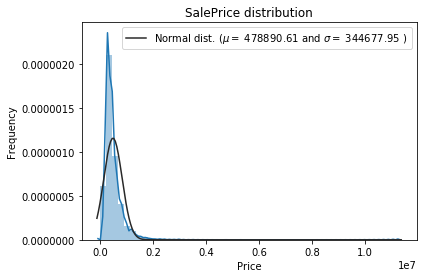

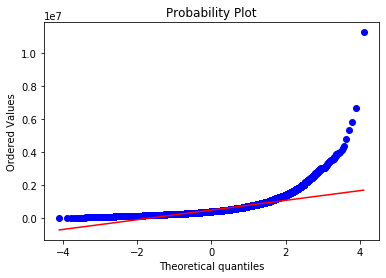

In [52]:
sns.distplot(eal10['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(eal10['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(eal10['Price'], plot=plt)
plt.show()


 mu = 12.90 and sigma = 0.58



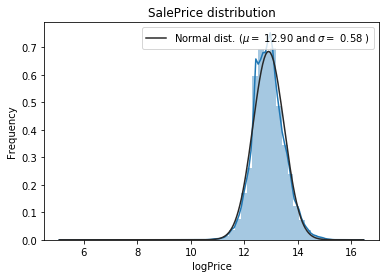

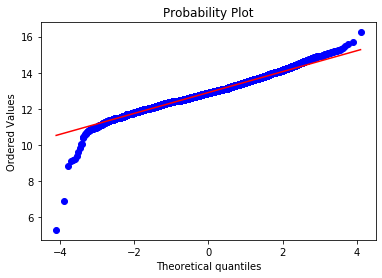

In [53]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
eal10['logPrice'] = np.log1p(eal10['Price'])

#Check the new distribution 
sns.distplot(eal10['logPrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(eal10['logPrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(eal10['logPrice'], plot=plt)
plt.show()